# Practice 7: Neural Networks

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**

**Video Walkthough by Tom**

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [1]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

====== This should generate a FutureWaring on Conversion ===== ignore this warning


Using TensorFlow backend.


## The data sets
We will work with the following data sets:
- Section I: Iris flower dataset from Practice 2 & 4
- Section II: Breast cancer data from Project 1 & 2
- Section III: [MNIST](https://en.wikipedia.org/wiki/MNIST_database) handwritten digits. This is our first image data set. Each image is 16x16 grayscale pixels. 
<p>


# Section I: Iris Flowers 
=== *You must run Section 0 before this section* ===
## Neural Networks to Classify Iris Flowers

Remember the iris flower data set has four features for each flower. Each flower is in one of three species of Iris.

We will train a simple neural network to learn to classify the Iris flowers

First we will read in the Iris database...



In [0]:
# Read in the iris data file from stored in a raw file in GitHub
url_iris = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/Iris.csv'
iris = pd.read_csv(url_iris)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

species = iris['Species'].unique()


In [3]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Set up the input and output 
In the past we have called the input **"X"** and the output **"y"** but when working with multiple datasets we will use **"Xiris"** for the input features for the iris flower dataset. Likewise we will use **"yiris"** for the output categories for the iris flowers.


**Scale Data:** Neural Networks work best with the inputs are between -1 and +1, so the MinMaxScaler is used to scale all the inputs to the range 0 to +1.


**Split the Data:** The Iris data is split with 80% used for training and 20% used for testing.

**One-Hot Encoding:** Neural Networks like the output as one-hot encoding. This is a list of values, one for each category, which are all zeros except one which is 1 which represents the correct category.

So, if we have three iris species, we map each one to a one-hot encoding:
- Iris-setosa = [ 1, 0, 0 ]
- Iris-virginica  = [ 0, 1, 0 ]
- Iris-versicolor = [ 0, 0, 1 ]


In [0]:
input_Size = 4
output_Size = 3

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
Xiris = iris[feature_columns].values
# We need the species labels converted to numbers for the neural network
yiris = LabelEncoder().fit_transform(iris["Species"])

# Scale the input data
mmScaler = MinMaxScaler()
Xiris = mmScaler.fit_transform(Xiris)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xiris, yiris.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has three values with only one with a value of 1
y_train = np_utils.to_categorical(y_train, output_Size)
y_test = np_utils.to_categorical(y_test, output_Size)

In [51]:
print ("X_train training data is 120 flowers with 4 features each: " ,X_train.shape)
print ("X_test testing data is 30 flowers with 4 features each: " ,X_test.shape)

print ("y_train output is 1 of 3 species for 120 flowers: " ,y_train.shape)
print ("y_test output is 1 of 3 species for 30 flowers: : " ,y_test.shape)

X_train training data is 120 flowers with 4 features each:  (120, 4)
X_test testing data is 30 flowers with 4 features each:  (30, 4)
y_train output is 1 of 3 species for 120 flowers:  (120, 3)
y_test output is 1 of 3 species for 30 flowers: :  (30, 3)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: Input values are assigned to these units
- Hidden layer 1: 8 units using Rectified Linear Units (relu)
- Hidden layer 2: 6 units using Rectified Linear Units (relu)
- Output  layer: 3 units using softmax so sum of the three units will be 1.0

![neural network diagram](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/Iris%20Neural%20Network.png)




## Task 1: Understanding the Network Stucture

Answer the following questions about the network:

1. Why is the input size or dimension set to 4? Is this dependent on the data? Why is it 4 with the iris data?
2. Why is the the output size set to 3? How is dependent on the data used? How does this relate to the iris data?
3. This network uses "Dense" hidden layers where each node is connected to every node in the previous layer. Node 3 in Hidden layer 1 is highlight in the diagram. Which nodes from which layer does Node 3 recieve inputs from?
4. Node 3 in Hidden layer 1 is highlight in the diagram. Which nodes from which layer does Node 3 send its outputs to?

In [0]:
# Set up the Neural Network

input_Size = 4
output_Size = 3

Iris_neuralNetwork = Sequential()
Iris_neuralNetwork.add(Dense(8, activation='relu', input_dim=(input_Size)))
Iris_neuralNetwork.add(Dense(6, activation='relu'))
Iris_neuralNetwork.add(Dense(output_Size, activation='softmax'))


## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient decent method for changing the wieghts during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
Iris_neuralNetwork.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 120 training flowers through the network and update the weights. The 30 testing flowers are then used to validate the model. 

- epochs = 50 means to run the training 50 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
Note: sometimes training will take minutes, if not hours to run, especially later when we get to complex networks

In [54]:
# Fit model on training data for network with dense input layer
history = Iris_neuralNetwork.fit(X_train, y_train,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 1.1089 - acc: 0.3417 - val_loss: 1.1140 - val_acc: 0.3000
Epoch 2/50
120/120 [==============================] - 0s 86us/step - loss: 1.1068 - acc: 0.3417 - val_loss: 1.1111 - val_acc: 0.3000
Epoch 3/50
120/120 [==============================] - 0s 79us/step - loss: 1.1047 - acc: 0.3417 - val_loss: 1.1084 - val_acc: 0.3000
Epoch 4/50
120/120 [==============================] - 0s 74us/step - loss: 1.1027 - acc: 0.3417 - val_loss: 1.1057 - val_acc: 0.3000
Epoch 5/50
120/120 [==============================] - 0s 81us/step - loss: 1.1006 - acc: 0.3417 - val_loss: 1.1032 - val_acc: 0.3000
Epoch 6/50
120/120 [==============================] - 0s 76us/step - loss: 1.0987 - acc: 0.3417 - val_loss: 1.1007 - val_acc: 0.3000
Epoch 7/50
120/120 [==============================] - 0s 65us/step - loss: 1.0967 - acc: 0.3417 - val_loss: 1.0983 - val_acc: 0.3000
Epoch 8/50
120/120 [=====

In [48]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = Iris_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
30/30 [==============================] - 0s 118us/step
The accuracy for this model is  0.83


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

(0, 1)

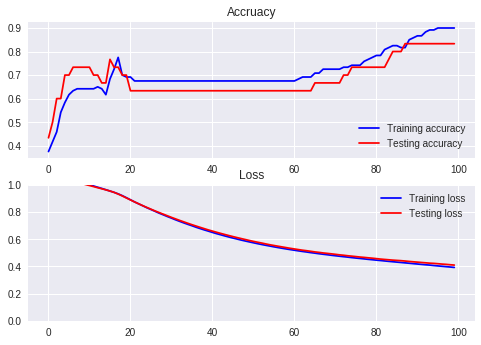

In [49]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)
plt.ylim(0,1)


## Task 2: Improving the Network

1. What is the training accuracy, acc, and the testing accuracy, val_acc, of the model?

2. Change the number of epochs used during training from 50 to 200. 
 - Go back up to Task 1 and re-run all the cells down to this cell to re-train the network
 
3. Try more hidden layers. The more hidden layers, the  more internal features the nework can learn. Try changing the number of nodes in each hidden layer to larger numbers. How accurate can you get the network? 
 - Go back up to Task 1 and re-run all the cells down to this cell to re-train the network

## Task 3: Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the iris species for a new flower with 
- SepalLengthCm = 5.2	
- SepalWidthCm = 3.3
- PetalLengthCm = 1.4
- PetalWidthCm	= 0.2

This should be a Iris-setosa

Change the code below to make a prediction for a new flower with the following measurements.
- SepalLengthCm = 4.2	
- SepalWidthCm = 3.0
- PetalLengthCm = 3.4
- PetalWidthCm	= 1.2

This should be a Iris-setosa

In [0]:
# The parameter order is SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
flowerMeasurements = [ [5.2, 3.3, 1.4, 0.2] ]

# Scale the data since the original training data was scaled
flowerMeasurements = mmScaler.transform(flowerMeasurements).reshape(1, -1) 

# Use the neural network to generate the prediction
prediction = Iris_neuralNetwork.predict(flowerMeasurements)

# The prediction is a score for how likely each species is, the highest value corresponds to the predicted species
print ("Predicted score for each Iris species is ", prediction)

# select the indix with the maximum probability
irisNum = np.argmax(prediction)
print ("This flower is of type : ", species[irisNum])

Predicted score for each Iris species is  [[0.7873379  0.13966392 0.07299826]]
This flower is of type :  Iris-setosa


# Section II: Breast Cancer Data
=== *You must run Section 0 before this section* ===
### Neural Networks with the cancer dataset
The following code loads in the breast cancer dataset

In [0]:
 
  # Read in the breast cancer data file from stored in a raw file in GitHub
url_bc = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/breast-cancer-wisconsin-data.csv'

cancer = pd.read_csv(url_bc)
# Set the Id column as the index since it is unique for each pati
cancer.set_index('id', inplace=True)

In [0]:
# Display the first 5 rows at the start, or head, of the dataframe
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Set up the Input and output, X and y

Here we will use Xcancer and ycancer instead of X and y for the input features and output categories.

This data set has 569 tumors with 30 features on each tumor, along with each tumor's category as Benign or Malignant.

We will also scale the data so that all features are converted to the range of 0 to +1

In [0]:
input_Size = 30
output_Size = 2

# === Select all the data for input ===
Xcancer = cancer.iloc[:, 1:31] 
# The output is the diagnosis where M is Malignant and B is Benign
# We need the diagnosis labels converted to numbers for the neural network
ycancer = LabelEncoder().fit_transform(cancer["diagnosis"])

# Scale the input data
mmScaler = MinMaxScaler()
Xcancer = mmScaler.fit_transform(Xcancer)

# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(Xcancer, ycancer.ravel(), test_size=0.2)

# Format the output as one-hot encodings. Each output has two values with only one with a value of 1
y_train = np_utils.to_categorical(y_train, output_Size)
y_test = np_utils.to_categorical(y_test, output_Size)

## Task 2: Neural Network

The code below runs KNN using the three closest neighbors. It uses KNN on:
- The original data with 30 features, Xcancer
- Data reduced to 1 component with PCA, XcancerPCA1
- Data reduced to 3 component with PCA, XcancerPCA3
- Data reduced to 5 component with PCA, XcancerPCA5


 ### Analyze at the scores
 - How close were the scores?
 - Did PCA improve the scores?
 - If PCA did not improve the scores, would it reduce the memory or time needed to run the KNN algorithm?
---


### Neural Network








In [0]:
# Set up the Neural Network

input_Size = 30
output_Size = 2

Cancer_neuralNetwork = Sequential()
Cancer_neuralNetwork.add(Dense(32, activation='relu', input_dim=(input_Size)))
Cancer_neuralNetwork.add(Dense(24, activation='relu'))
Cancer_neuralNetwork.add(Dense(output_Size, activation='softmax'))


In [0]:
# Compile neural network model
Cancer_neuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit model on training data for network with dense input layer
batch_size = 100
epochs = 200
history = Cancer_neuralNetwork.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))


Train on 455 samples, validate on 114 samples
Epoch 1/200
 - 1s - loss: 0.6911 - acc: 0.6198 - val_loss: 0.6894 - val_acc: 0.6404
Epoch 2/200
 - 0s - loss: 0.6866 - acc: 0.6198 - val_loss: 0.6843 - val_acc: 0.6404
Epoch 3/200
 - 0s - loss: 0.6816 - acc: 0.6198 - val_loss: 0.6790 - val_acc: 0.6404
Epoch 4/200
 - 0s - loss: 0.6765 - acc: 0.6198 - val_loss: 0.6737 - val_acc: 0.6404
Epoch 5/200
 - 0s - loss: 0.6715 - acc: 0.6198 - val_loss: 0.6684 - val_acc: 0.6404
Epoch 6/200
 - 0s - loss: 0.6666 - acc: 0.6220 - val_loss: 0.6634 - val_acc: 0.6404
Epoch 7/200
 - 0s - loss: 0.6618 - acc: 0.6220 - val_loss: 0.6584 - val_acc: 0.6404
Epoch 8/200
 - 0s - loss: 0.6571 - acc: 0.6286 - val_loss: 0.6534 - val_acc: 0.6491
Epoch 9/200
 - 0s - loss: 0.6525 - acc: 0.6330 - val_loss: 0.6484 - val_acc: 0.6579
Epoch 10/200
 - 0s - loss: 0.6479 - acc: 0.6527 - val_loss: 0.6434 - val_acc: 0.6930
Epoch 11/200
 - 0s - loss: 0.6433 - acc: 0.6747 - val_loss: 0.6384 - val_acc: 0.7544
Epoch 12/200
 - 0s - loss: 0

In [0]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = Cancer_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
114/114 [==============================] - 0s 69us/step
The accuracy for this model is  0.97


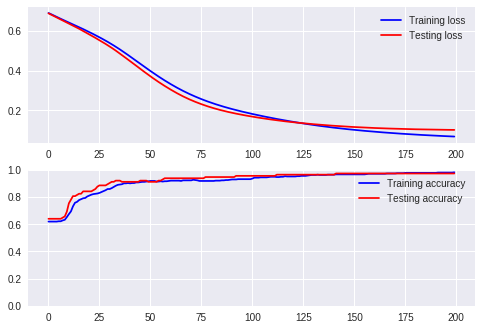

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
plt.ylim(0,1)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Section III 
=== *You must run Section 0 before this section* ===
### MNIST hand written digits

We will load the MNIST data set built into the scikit learning library.

The images are 16x16 pixels which means each image has 64 features. This is now getting large enought so that dimensional reduction might be useful.



In [0]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
url_kaggle_train = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/train.csv'
url_kaggle_test = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/test.csv'
  
train_kaggle = pd.read_csv(url_kaggle_train)
# Pull out the labels or output which are saved in first index
y_train_kaggle = train_kaggle.iloc[:,0].values.astype('int32')
# Convert remaining values to floats
X_train_kaggle = (train_kaggle.iloc[:,1:].values).astype('float32')
# Read the kaggle test data which is used for submissions
X_submit_kaggle = (pd.read_csv(url_kaggle_test).values).astype('float32')
#reshape as 28x28 pixel images
X_train_kaggle = X_train_kaggle.reshape(X_train_kaggle.shape[0], 28, 28)
X_submit_kaggle = X_submit_kaggle.reshape(X_submit_kaggle.shape[0], 28, 28)

print ("X_train_kaggle training data shape of 28x28 pixels greyscale: " ,X_train_kaggle.shape)
print ("X_submit_kaggle submission data shape of 28x28 pixels greyscale: : " ,X_submit_kaggle.shape)

X_train_kaggle training data shape of 28x28 pixels greyscale:  (42000, 28, 28)
X_submit_kaggle submission data shape of 28x28 pixels greyscale: :  (28000, 28, 28)


In [0]:
train_kaggle.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


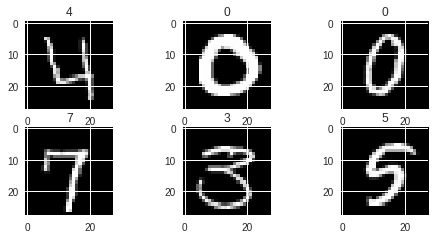

In [0]:
for i in range(3, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_kaggle[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train_kaggle[i]);

In [0]:

input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

# Normalize the data so values are between 0 and 1 instead of between 0 and 255
X_train_kaggle = X_train_kaggle / 255
X_submit_kaggle = X_submit_kaggle / 255

#reshape for dense-only inputs
train_size = X_train_kaggle.shape[0]
submit_size = X_submit_kaggle.shape[0]
X_train_kaggle = X_train_kaggle.reshape(train_size, 28 * 28)
X_submit_kaggle = X_submit_kaggle.reshape(submit_size, 28 * 28)

# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train_kaggle, y_train_kaggle, test_size=0.1)

# A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
y_train = np_utils.to_categorical(y_train_num, output_Size)
y_test = np_utils.to_categorical(y_test_num, output_Size)


In [0]:
print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (37800, 784)
X_test submission data shape of 28x28 pixels greyscale: :  (4200, 784)
y_train training data shape of 28x28 pixels greyscale:  (37800, 10)
y_test submission data shape of 28x28 pixels greyscale: :  (4200, 10)


## Task 4: Neural Network
Using all 64 pixels, Support Vector Machines can recognize the correct digit from an MNIST image nearly 100% of the time. 

Use the two code blocks below to try different number of components which still reduces the featues significantly while keeping prediction scores relatively high. In the starting example, reducing the 64 features to only 3 components reduces the score a lot to only 72%


 ### Find a good balance 
 - Find a good balance between the number of components and the prediction score. What value for n_components results in a good score while still reducing the number of features significantly?
 
---


In [0]:
# Set up the Neural Network
input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

Digit_neuralNetwork = Sequential()
Digit_neuralNetwork.add(Dense(20, activation='relu', input_dim=(input_Size)))
Digit_neuralNetwork.add(Dense(10, activation='relu'))
Digit_neuralNetwork.add(Dense(output_Size, activation='softmax'))


In [0]:
# Compile neural network model
Digit_neuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit model on training data for network with dense input layer
batch_size = 200
epochs = 50
history = Digit_neuralNetwork.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))


Train on 37800 samples, validate on 4200 samples
Epoch 1/50
 - 1s - loss: 2.2572 - acc: 0.1999 - val_loss: 2.1586 - val_acc: 0.2702
Epoch 2/50
 - 1s - loss: 1.9800 - acc: 0.3267 - val_loss: 1.7979 - val_acc: 0.4055
Epoch 3/50
 - 1s - loss: 1.6502 - acc: 0.4582 - val_loss: 1.4975 - val_acc: 0.5140
Epoch 4/50
 - 1s - loss: 1.4085 - acc: 0.5327 - val_loss: 1.3078 - val_acc: 0.5764
Epoch 5/50
 - 1s - loss: 1.2547 - acc: 0.5848 - val_loss: 1.1763 - val_acc: 0.6198
Epoch 6/50
 - 1s - loss: 1.1386 - acc: 0.6266 - val_loss: 1.0714 - val_acc: 0.6564
Epoch 7/50
 - 1s - loss: 1.0440 - acc: 0.6619 - val_loss: 0.9876 - val_acc: 0.6795
Epoch 8/50
 - 1s - loss: 0.9671 - acc: 0.6902 - val_loss: 0.9152 - val_acc: 0.7088
Epoch 9/50
 - 1s - loss: 0.9038 - acc: 0.7158 - val_loss: 0.8703 - val_acc: 0.7193
Epoch 10/50
 - 1s - loss: 0.8535 - acc: 0.7317 - val_loss: 0.8145 - val_acc: 0.7526
Epoch 11/50
 - 1s - loss: 0.8105 - acc: 0.7465 - val_loss: 0.7738 - val_acc: 0.7624
Epoch 12/50
 - 1s - loss: 0.7734 - a

In [0]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = Digit_neuralNetwork.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
4200/4200 [==============================] - 0s 30us/step
The accuracy for this model is  0.90


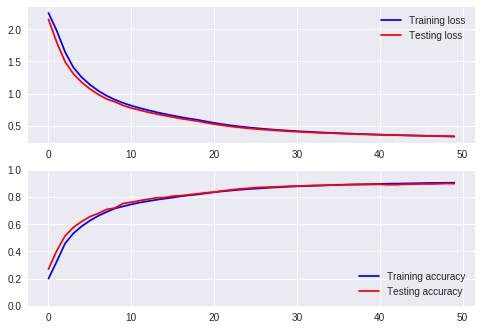

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
plt.ylim(0,1)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

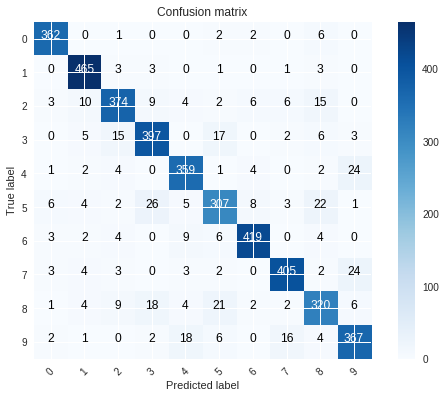

In [0]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    X_test, y_test
    
# Predict the values from the validation dataset
Y_pred = Digit_neuralNetwork.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
# Y_true = np.argmax(y_test_num,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_num, Y_pred_classes) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## Create the Submission for Kaggle

The following code generates a file named CIS3115_Submission.csv which you need to download to your local PC and then upload to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit).


In [0]:
predictions = Digit_neuralNetwork.predict_classes(X_submit_kaggle, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})

submissions.to_csv("CIS3115_Submission.csv", index=False, header=True)

# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.